## Principal Component Analysis (PCA) for dimensionality reduction

Blood Glucose PCA Summary:
  Original Features: 72
  Reduced Features: 12
  Variance Retained: 0.9558830413261298
Insulin PCA Summary:
  Original Features: 72
  Reduced Features: 69
  Variance Retained: 0.9620851436842282
Carbohydrates PCA Summary:
  Original Features: 72
  Reduced Features: 22
  Variance Retained: 0.9504706258307779
Heart Rate PCA Summary:
  Original Features: 72
  Reduced Features: 23
  Variance Retained: 0.9520667950654347
Steps PCA Summary:
  Original Features: 72
  Reduced Features: 56
  Variance Retained: 0.9522641784880455
Calories PCA Summary:
  Original Features: 72
  Reduced Features: 37
  Variance Retained: 0.950057327627474
Activity PCA Summary:
  Original Features: 1656
  Reduced Features: 460
  Variance Retained: 0.9500141123451501


<Figure size 1000x600 with 0 Axes>

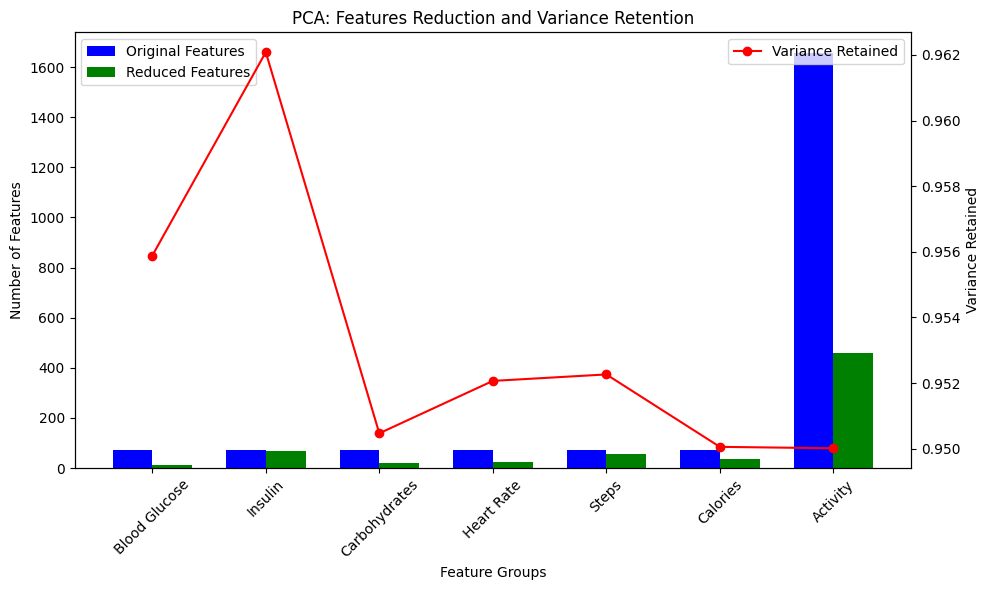

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def apply_pca(data, variance_threshold=0.95):
    """
    Apply PCA with variance preservation threshold

    Args:
    - data: Input feature matrix
    - variance_threshold: Percentage of variance to retain

    Returns:
    - Transformed data
    - Feature summary with original column names
    """
    # Separate different feature types
    bg_columns = [col for col in data.columns if col.startswith('bg-')]
    insulin_columns = [col for col in data.columns if col.startswith('insulin-')]
    carbs_columns = [col for col in data.columns if col.startswith('carbs-')]
    hr_columns = [col for col in data.columns if col.startswith('hr-')]
    steps_columns = [col for col in data.columns if col.startswith('steps-')]
    cals_columns = [col for col in data.columns if col.startswith('cals-')]
    activity_columns = [col for col in data.columns if col.startswith('activity-')]
    target_column = 'bg+1:00'

    # Preprocessing
    scaler = StandardScaler()

    # Separate feature groups and apply PCA independently
    feature_groups = {
        'Blood Glucose': bg_columns,
        'Insulin': insulin_columns,
        'Carbohydrates': carbs_columns,
        'Heart Rate': hr_columns,
        'Steps': steps_columns,
        'Calories': cals_columns,
        'Activity': activity_columns
    }

    transformed_data = data.copy()
    feature_summary = {}

    for group_name, columns in feature_groups.items():
        if not columns:
            continue

        # Extract and scale features
        X = data[columns]
        X_scaled = scaler.fit_transform(X)

        # Apply PCA
        pca = PCA(n_components=variance_threshold)
        X_pca = pca.fit_transform(X_scaled)

        # Compute number of components and variance explained
        n_components = X_pca.shape[1]
        explained_variance = np.sum(pca.explained_variance_ratio_)

        # Store summary
        feature_summary[group_name] = {
            'Original Features': len(columns),
            'Reduced Features': n_components,
            'Variance Retained': explained_variance
        }

        # Overwrite the original columns with PCA-transformed data
        for i in range(n_components):
            if i < len(columns):
                transformed_data[columns[i]] = X_pca[:, i]
            else:
                transformed_data[f'{group_name}_extra_PC{i+1}'] = X_pca[:, i]

    # Add target column (unchanged)
    transformed_data[target_column] = data[target_column]

    return transformed_data, feature_summary

def plot_variance_explained(feature_summary):
    """
    Visualize variance explained for each feature group
    """
    plt.figure(figsize=(10, 6))
    groups = list(feature_summary.keys())
    original_features = [feature_summary[g]['Original Features'] for g in groups]
    reduced_features = [feature_summary[g]['Reduced Features'] for g in groups]
    variance_retained = [feature_summary[g]['Variance Retained'] for g in groups]

    x = np.arange(len(groups))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    ax1.bar(x - width/2, original_features, width, label='Original Features', color='blue')
    ax1.bar(x + width/2, reduced_features, width, label='Reduced Features', color='green')
    ax1.set_xlabel('Feature Groups')
    ax1.set_ylabel('Number of Features')
    ax1.set_title('PCA: Features Reduction and Variance Retention')
    ax1.set_xticks(x)
    ax1.set_xticklabels(groups, rotation=45)
    ax1.legend(loc='upper left')

    ax2.plot(x, variance_retained, color='red', marker='o', label='Variance Retained')
    ax2.set_ylabel('Variance Retained')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

def main():
    # Load your dataset
    data = pd.read_csv('/kaggle/input/train-knn-imputed-final-with-1hot-encoding/train_knn_imputed_final_with_1hot_encoding.csv')

    # Apply PCA
    reduced_data, feature_summary = apply_pca(data)

    # Print feature summary
    for group, summary in feature_summary.items():
        print(f"{group} PCA Summary:")
        for key, value in summary.items():
            print(f"  {key}: {value}")

    # Plot variance explained
    plot_variance_explained(feature_summary)

    return reduced_data

if __name__ == '__main__':
    reduced_dataset = main()


## LSTM using KNN With one-hot encoding (activity included) using PCA reduced dataset

Epoch 1/10


I0000 00:00:1734019040.702335     134 service.cc:145] XLA service 0x5c964271e700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734019040.702379     134 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734019040.702385     134 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  96/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2427 - mae: 1.2661

I0000 00:00:1734019045.279712     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1771/1771 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.4739 - mae: 0.4419 - val_loss: 0.0677 - val_mae: 0.1924
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0786 - mae: 0.2050 - val_loss: 0.0580 - val_mae: 0.1798
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0595 - mae: 0.1826 - val_loss: 0.0530 - val_mae: 0.1735
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0555 - mae: 0.1771 - val_loss: 0.0515 - val_mae: 0.1699
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0529 - mae: 0.1727 - val_loss: 0.0505 - val_mae: 0.1687
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0513 - mae: 0.1694 - val_loss: 0.0492 - val_mae: 0.1669
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0494 - mae: 0.1657 - val_loss: 0.0488 - val_mae: 0.1662
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0460 - mae: 0.1629 - val_loss: 0.0484 - val_mae: 0.1652
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/s

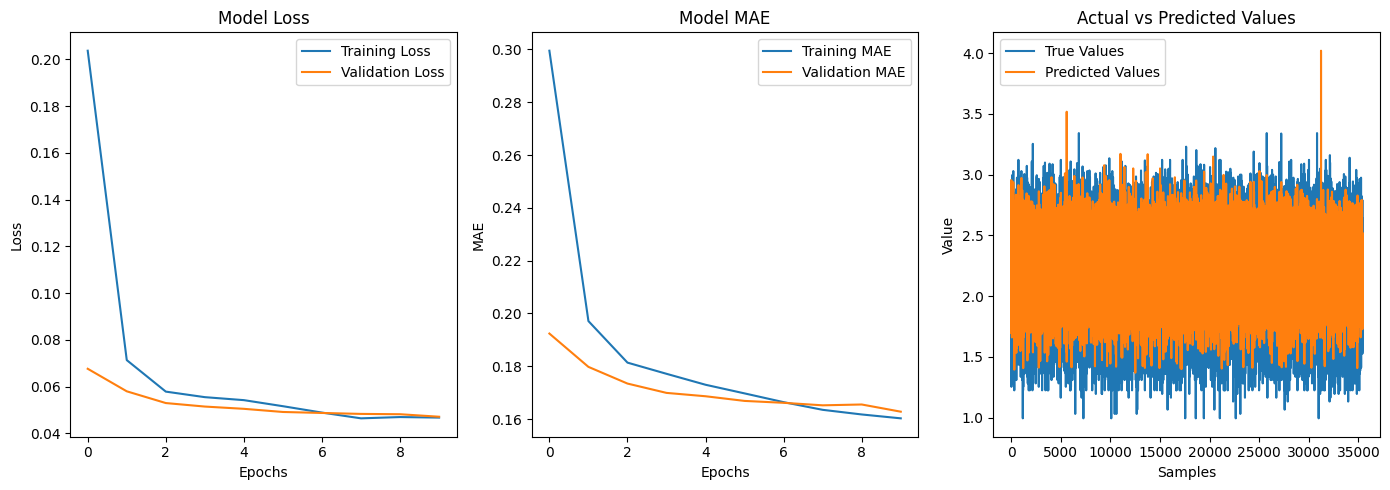

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
# file_path = '/kaggle/input/train-knn-imputed-final-with-1hot-encoding/train_knn_imputed_final_with_1hot_encoding.csv'
data = reduced_dataset

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM model with proper input layer to avoid warnings
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Defining input shape for the model
        LSTM(64, activation='relu', return_sequences=True),  # Adding LSTM layer
        Dropout(0.3),  # Applying dropout for regularization
        LSTM(32, activation='relu'),  # Second LSTM layer
        Dropout(0.2),
        Dense(16, activation='relu'),  # Adding Dense layer
        Dense(1)  # Output layer for regression
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])  # Compiling model
    return model

# Initializing and training the LSTM model
model = create_lstm_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
training_duration = round(time.time() - start_time, 2)
print(f"{training_duration} sec for training")

# Making predictions on the test set
predicted_values = model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, predicted_values))
mean_absolute_error_value = mean_absolute_error(y_test, predicted_values)
mean_squared_error_value = mean_squared_error(y_test, predicted_values)
r_squared_value = r2_score(y_test, predicted_values)

print(f"RMSE: {root_mean_squared_error:.4f}")
print(f"MAE: {mean_absolute_error_value:.4f}")
print(f"MSE: {mean_squared_error_value:.4f}")
print(f"R² Score: {r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM using KNN With one-hot encoding (activity included)

Epoch 1/10


I0000 00:00:1733933657.199704      90 service.cc:145] XLA service 0x7f56dc004ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733933657.199758      90 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733933657.199763      90 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  82/1771 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.5134 - mae: 1.3910  

I0000 00:00:1733933662.208182      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1771/1771 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.4809 - mae: 0.4588 - val_loss: 0.0755 - val_mae: 0.2097
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0704 - mae: 0.1967 - val_loss: 0.0554 - val_mae: 0.1792
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0570 - mae: 0.1809 - val_loss: 0.0556 - val_mae: 0.1811
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0540 - mae: 0.1761 - val_loss: 0.0550 - val_mae: 0.1808
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0510 - mae: 0.1715 - val_loss: 0.0507 - val_mae: 0.1716
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0494 - mae: 0.1684 - val_loss: 0.0496 - val_mae: 0.1700
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0468 - mae: 0.1643 - val_loss: 0.0467 - val_mae: 0.1636
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0462 - mae: 0.1625 - val_loss: 0.0472 - val_mae: 0.1650
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/s

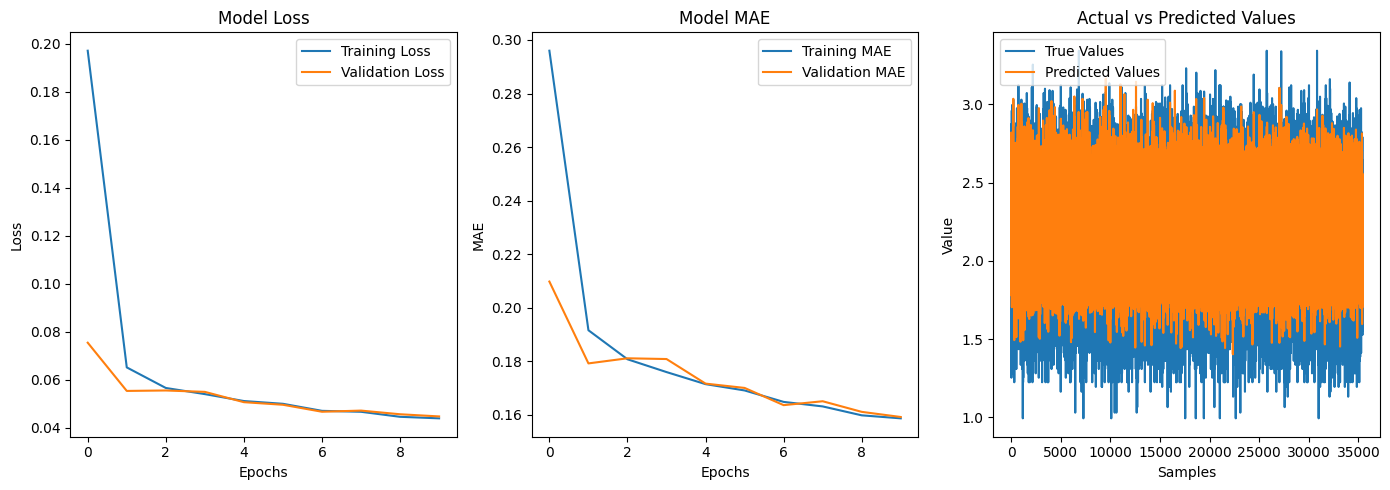

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-knn-imputed-final-with-1hot-encoding/train_knn_imputed_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM model with proper input layer to avoid warnings
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Defining input shape for the model
        LSTM(64, activation='relu', return_sequences=True),  # Adding LSTM layer
        Dropout(0.3),  # Applying dropout for regularization
        LSTM(32, activation='relu'),  # Second LSTM layer
        Dropout(0.2),
        Dense(16, activation='relu'),  # Adding Dense layer
        Dense(1)  # Output layer for regression
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])  # Compiling model
    return model

# Initializing and training the LSTM model
model = create_lstm_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
training_duration = round(time.time() - start_time, 2)
print(f"{training_duration} sec for training")

# Making predictions on the test set
predicted_values = model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, predicted_values))
mean_absolute_error_value = mean_absolute_error(y_test, predicted_values)
mean_squared_error_value = mean_squared_error(y_test, predicted_values)
r_squared_value = r2_score(y_test, predicted_values)

print(f"RMSE: {root_mean_squared_error:.4f}")
print(f"MAE: {mean_absolute_error_value:.4f}")
print(f"MSE: {mean_squared_error_value:.4f}")
print(f"R² Score: {r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM-BiLSTM using KNN With one-hot encoding (activity included)

Epoch 1/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.4835 - mae: 0.4536 - val_loss: 0.0752 - val_mae: 0.2048
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0814 - mae: 0.2097 - val_loss: 0.0659 - val_mae: 0.1919
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0619 - mae: 0.1853 - val_loss: 0.0532 - val_mae: 0.1743
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0538 - mae: 0.1752 - val_loss: 0.0513 - val_mae: 0.1723
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0508 - mae: 0.1700 - val_loss: 0.0514 - val_mae: 0.1732
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0486 - mae: 0.1668 - val_loss: 0.0490 - val_mae: 0.1686
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0468 - mae: 0.1637 - val_loss: 0.0481 - val_mae: 0.1669
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0446 - mae: 0.1607 - val_loss: 0.0454 - val_mae: 0.1611
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━

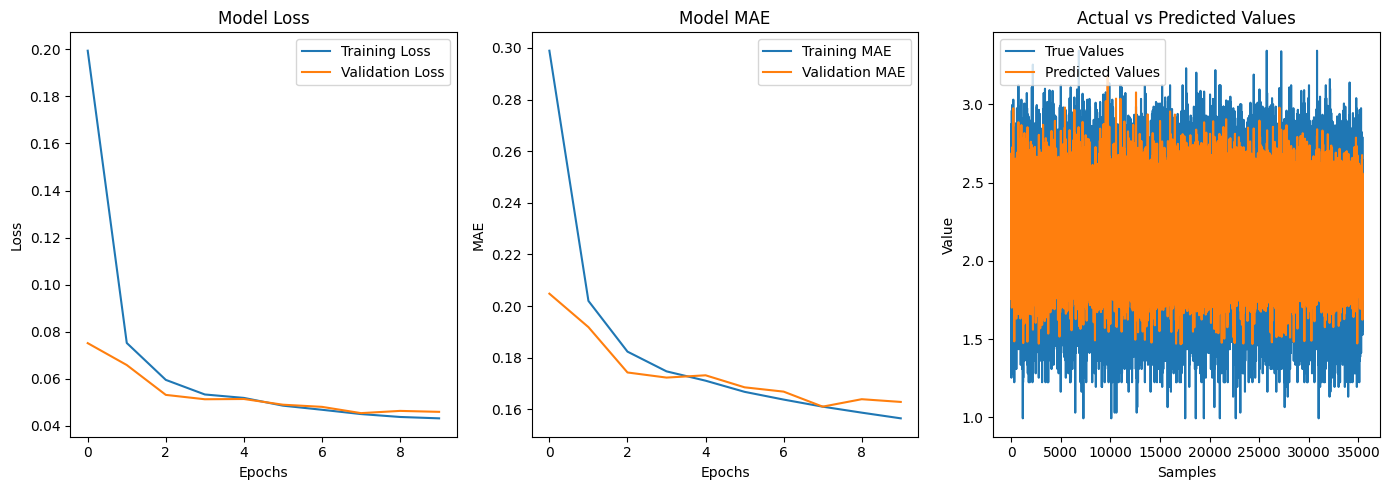

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-knn-imputed-final-with-1hot-encoding/train_knn_imputed_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM-BiLSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM-BiLSTM cascade model
def create_lstm_bilstm_cascade_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, activation='relu', return_sequences=True)(inputs)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(32, activation='relu'))(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Initializing and training the LSTM-BiLSTM cascade model
cascade_model = create_lstm_bilstm_cascade_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_bilstm_cascade_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
cascade_history = cascade_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
cascade_training_duration = round(time.time() - start_time, 2)
print(f"{cascade_training_duration} sec for training")

# Making predictions on the test set
cascade_predicted_values = cascade_model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
cascade_root_mean_squared_error = np.sqrt(mean_squared_error(y_test, cascade_predicted_values))
cascade_mean_absolute_error_value = mean_absolute_error(y_test, cascade_predicted_values)
cascade_mean_squared_error_value = mean_squared_error(y_test, cascade_predicted_values)
cascade_r_squared_value = r2_score(y_test, cascade_predicted_values)

print(f"RMSE: {cascade_root_mean_squared_error:.4f}")
print(f"MAE: {cascade_mean_absolute_error_value:.4f}")
print(f"MSE: {cascade_mean_squared_error_value:.4f}")
print(f"R² Score: {cascade_r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(cascade_history.history['loss'], label='Training Loss')
plt.plot(cascade_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(cascade_history.history['mae'], label='Training MAE')
plt.plot(cascade_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(cascade_predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_bilstm_cascade_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM using bfill-ffill With one-hot encoding (activity included)

Epoch 1/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.4897 - mae: 0.4634 - val_loss: 0.0748 - val_mae: 0.2080
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0738 - mae: 0.2051 - val_loss: 0.0590 - val_mae: 0.1854
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0609 - mae: 0.1876 - val_loss: 0.0575 - val_mae: 0.1854
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0570 - mae: 0.1816 - val_loss: 0.0538 - val_mae: 0.1770
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0560 - mae: 0.1780 - val_loss: 0.0530 - val_mae: 0.1744
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0562 - mae: 0.1755 - val_loss: 0.0541 - val_mae: 0.1788
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0500 - mae: 0.1692 - val_loss: 0.0521 - val_mae: 0.1754
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0494 - mae: 0.1685 - val_loss: 0.0497 - val_mae: 0.1708
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━

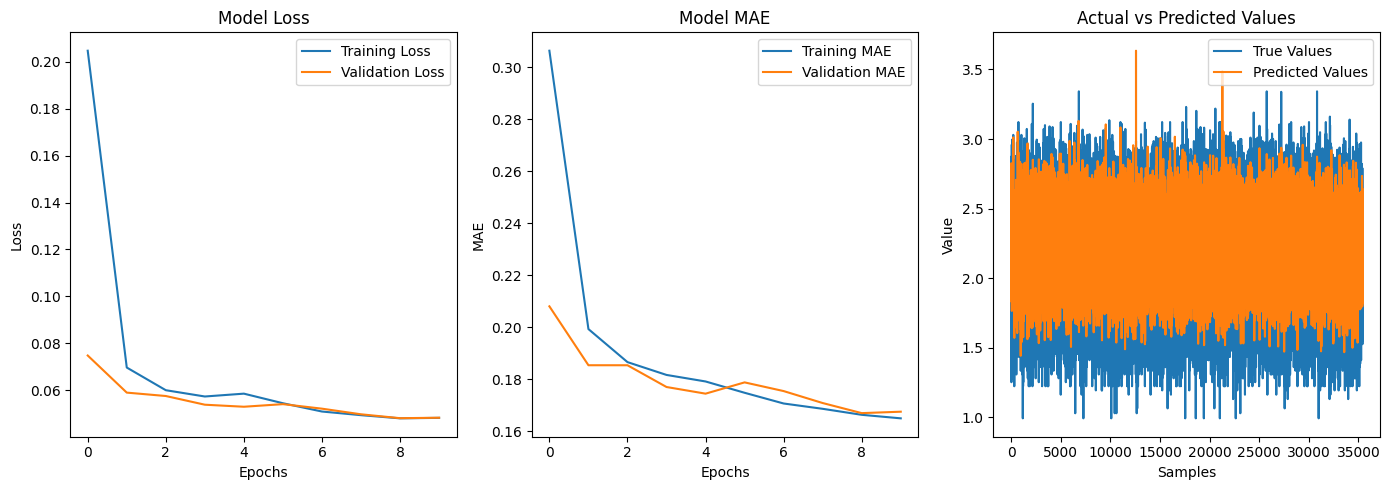

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-ffill-bfill-final-with-1hot-encoding/train_ffill_bfill_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM model with proper input layer to avoid warnings
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Defining input shape for the model
        LSTM(64, activation='relu', return_sequences=True),  # Adding LSTM layer
        Dropout(0.3),  # Applying dropout for regularization
        LSTM(32, activation='relu'),  # Second LSTM layer
        Dropout(0.2),
        Dense(16, activation='relu'),  # Adding Dense layer
        Dense(1)  # Output layer for regression
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])  # Compiling model
    return model

# Initializing and training the LSTM model
model = create_lstm_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
training_duration = round(time.time() - start_time, 2)
print(f"{training_duration} sec for training")

# Making predictions on the test set
predicted_values = model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, predicted_values))
mean_absolute_error_value = mean_absolute_error(y_test, predicted_values)
mean_squared_error_value = mean_squared_error(y_test, predicted_values)
r_squared_value = r2_score(y_test, predicted_values)

print(f"RMSE: {root_mean_squared_error:.4f}")
print(f"MAE: {mean_absolute_error_value:.4f}")
print(f"MSE: {mean_squared_error_value:.4f}")
print(f"R² Score: {r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM-BiLSTM using bfill-ffill with one-hot encoding (activity included)

Epoch 1/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.4099 - mae: 0.4230 - val_loss: 0.0695 - val_mae: 0.2009
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0784 - mae: 0.2060 - val_loss: 0.0585 - val_mae: 0.1852
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0608 - mae: 0.1872 - val_loss: 0.0577 - val_mae: 0.1812
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0634 - mae: 0.1859 - val_loss: 0.0552 - val_mae: 0.1796
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0592 - mae: 0.1811 - val_loss: 0.0541 - val_mae: 0.1772
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0546 - mae: 0.1748 - val_loss: 0.0541 - val_mae: 0.1780
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0544 - mae: 0.1736 - val_loss: 0.0503 - val_mae: 0.1692
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0517 - mae: 0.1709 - val_loss: 0.0494 - val_mae: 0.1678
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━

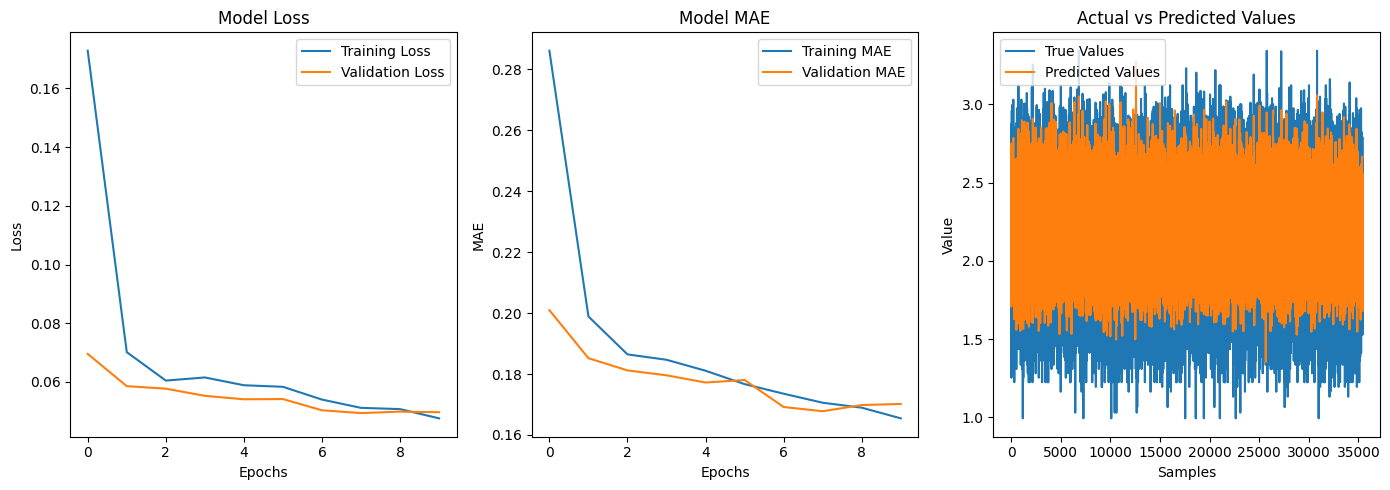

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-ffill-bfill-final-with-1hot-encoding/train_ffill_bfill_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM-BiLSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM-BiLSTM cascade model
def create_lstm_bilstm_cascade_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, activation='relu', return_sequences=True)(inputs)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(32, activation='relu'))(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Initializing and training the LSTM-BiLSTM cascade model
cascade_model = create_lstm_bilstm_cascade_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_bilstm_cascade_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
cascade_history = cascade_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
cascade_training_duration = round(time.time() - start_time, 2)
print(f"{cascade_training_duration} sec for training")

# Making predictions on the test set
cascade_predicted_values = cascade_model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
cascade_root_mean_squared_error = np.sqrt(mean_squared_error(y_test, cascade_predicted_values))
cascade_mean_absolute_error_value = mean_absolute_error(y_test, cascade_predicted_values)
cascade_mean_squared_error_value = mean_squared_error(y_test, cascade_predicted_values)
cascade_r_squared_value = r2_score(y_test, cascade_predicted_values)

print(f"RMSE: {cascade_root_mean_squared_error:.4f}")
print(f"MAE: {cascade_mean_absolute_error_value:.4f}")
print(f"MSE: {cascade_mean_squared_error_value:.4f}")
print(f"R² Score: {cascade_r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(cascade_history.history['loss'], label='Training Loss')
plt.plot(cascade_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(cascade_history.history['mae'], label='Training MAE')
plt.plot(cascade_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(cascade_predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_bilstm_cascade_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM using KNN With one-hot encoding (activity DROPPED)

Epoch 1/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.4643 - mae: 0.4558 - val_loss: 0.0737 - val_mae: 0.2088
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0688 - mae: 0.1962 - val_loss: 0.0619 - val_mae: 0.1935
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0575 - mae: 0.1820 - val_loss: 0.0570 - val_mae: 0.1843
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0536 - mae: 0.1752 - val_loss: 0.0516 - val_mae: 0.1737
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0513 - mae: 0.1715 - val_loss: 0.0502 - val_mae: 0.1704
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0498 - mae: 0.1686 - val_loss: 0.0502 - val_mae: 0.1690
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0468 - mae: 0.1635 - val_loss: 0.0489 - val_mae: 0.1678
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0478 - mae: 0.1635 - val_loss: 0.0462 - val_mae: 0.1628
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━

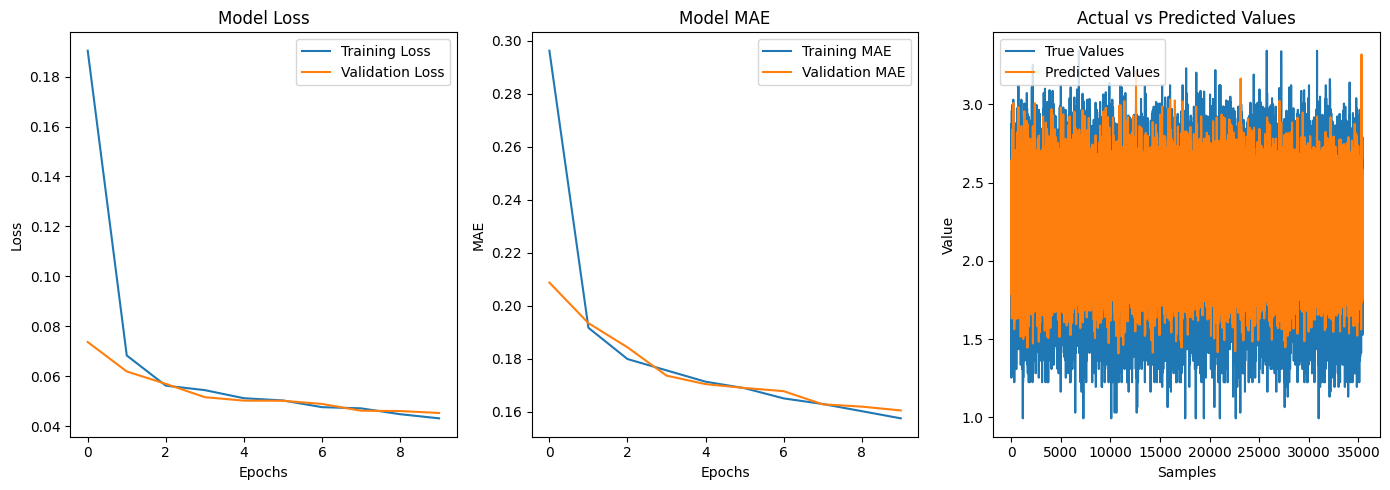

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-knn-imputed-final-with-1hot-encoding/train_knn_imputed_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Dropping activity-related columns
activity_columns = [col for col in data.columns if col.startswith('activity')]
data = data.drop(columns=activity_columns)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM model with proper input layer to avoid warnings
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Defining input shape for the model
        LSTM(64, activation='relu', return_sequences=True),  # Adding LSTM layer
        Dropout(0.3),  # Applying dropout for regularization
        LSTM(32, activation='relu'),  # Second LSTM layer
        Dropout(0.2),
        Dense(16, activation='relu'),  # Adding Dense layer
        Dense(1)  # Output layer for regression
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])  # Compiling model
    return model

# Initializing and training the LSTM model
model = create_lstm_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
training_duration = round(time.time() - start_time, 2)
print(f"{training_duration} sec for training")

# Making predictions on the test set
predicted_values = model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, predicted_values))
mean_absolute_error_value = mean_absolute_error(y_test, predicted_values)
mean_squared_error_value = mean_squared_error(y_test, predicted_values)
r_squared_value = r2_score(y_test, predicted_values)

print(f"RMSE: {root_mean_squared_error:.4f}")
print(f"MAE: {mean_absolute_error_value:.4f}")
print(f"MSE: {mean_squared_error_value:.4f}")
print(f"R² Score: {r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM-BiLSTM using KNN With one-hot encoding (activity DROPPED)

Epoch 1/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.4304 - mae: 0.4251 - val_loss: 0.0736 - val_mae: 0.1969
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0815 - mae: 0.2041 - val_loss: 0.0627 - val_mae: 0.1858
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0616 - mae: 0.1835 - val_loss: 0.0557 - val_mae: 0.1749
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0551 - mae: 0.1767 - val_loss: 0.0526 - val_mae: 0.1732
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0524 - mae: 0.1711 - val_loss: 0.0509 - val_mae: 0.1682
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0513 - mae: 0.1681 - val_loss: 0.0494 - val_mae: 0.1678
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0472 - mae: 0.1638 - val_loss: 0.0476 - val_mae: 0.1648
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0462 - mae: 0.1613 - val_loss: 0.0462 - val_mae: 0.1621
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━

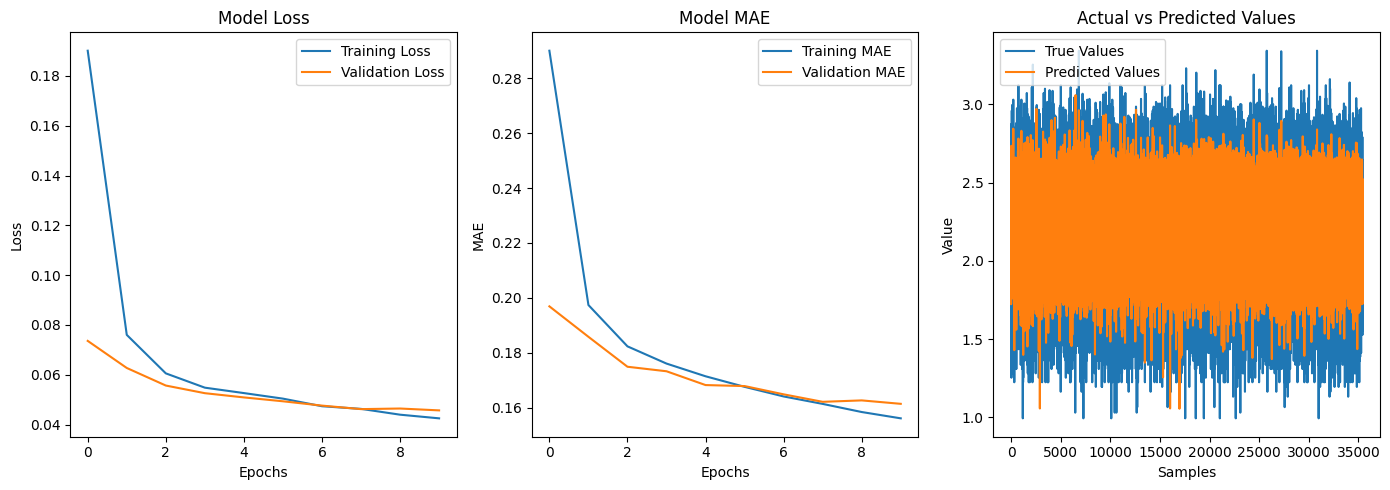

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-knn-imputed-final-with-1hot-encoding/train_knn_imputed_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Dropping activity-related columns
activity_columns = [col for col in data.columns if col.startswith('activity')]
data = data.drop(columns=activity_columns)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM-BiLSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM-BiLSTM cascade model
def create_lstm_bilstm_cascade_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, activation='relu', return_sequences=True)(inputs)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(32, activation='relu'))(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Initializing and training the LSTM-BiLSTM cascade model
cascade_model = create_lstm_bilstm_cascade_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_bilstm_cascade_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
cascade_history = cascade_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
cascade_training_duration = round(time.time() - start_time, 2)
print(f"{cascade_training_duration} sec for training")

# Making predictions on the test set
cascade_predicted_values = cascade_model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
cascade_root_mean_squared_error = np.sqrt(mean_squared_error(y_test, cascade_predicted_values))
cascade_mean_absolute_error_value = mean_absolute_error(y_test, cascade_predicted_values)
cascade_mean_squared_error_value = mean_squared_error(y_test, cascade_predicted_values)
cascade_r_squared_value = r2_score(y_test, cascade_predicted_values)

print(f"RMSE: {cascade_root_mean_squared_error:.4f}")
print(f"MAE: {cascade_mean_absolute_error_value:.4f}")
print(f"MSE: {cascade_mean_squared_error_value:.4f}")
print(f"R² Score: {cascade_r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(cascade_history.history['loss'], label='Training Loss')
plt.plot(cascade_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(cascade_history.history['mae'], label='Training MAE')
plt.plot(cascade_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(cascade_predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_bilstm_cascade_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM using bfill-ffill With one-hot encoding (activity DROPPED)

Epoch 1/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.6060 - mae: 0.5216 - val_loss: 0.0733 - val_mae: 0.2045
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0783 - mae: 0.2093 - val_loss: 0.0594 - val_mae: 0.1847
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0632 - mae: 0.1908 - val_loss: 0.0575 - val_mae: 0.1798
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0592 - mae: 0.1823 - val_loss: 0.0533 - val_mae: 0.1754
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0547 - mae: 0.1779 - val_loss: 0.0529 - val_mae: 0.1752
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0550 - mae: 0.1765 - val_loss: 0.0502 - val_mae: 0.1694
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0533 - mae: 0.1725 - val_loss: 0.0490 - val_mae: 0.1672
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0502 - mae: 0.1681 - val_loss: 0.0494 - val_mae: 0.1685
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━

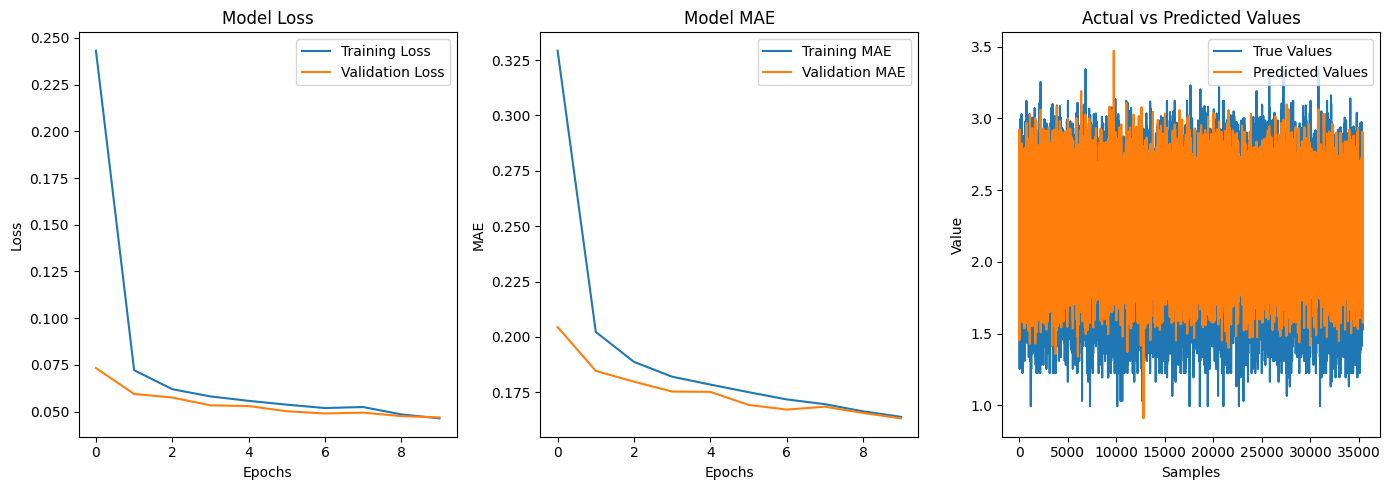

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-ffill-bfill-final-with-1hot-encoding/train_ffill_bfill_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Dropping activity-related columns
activity_columns = [col for col in data.columns if col.startswith('activity')]
data = data.drop(columns=activity_columns)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM model with proper input layer to avoid warnings
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Defining input shape for the model
        LSTM(64, activation='relu', return_sequences=True),  # Adding LSTM layer
        Dropout(0.3),  # Applying dropout for regularization
        LSTM(32, activation='relu'),  # Second LSTM layer
        Dropout(0.2),
        Dense(16, activation='relu'),  # Adding Dense layer
        Dense(1)  # Output layer for regression
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])  # Compiling model
    return model

# Initializing and training the LSTM model
model = create_lstm_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
training_duration = round(time.time() - start_time, 2)
print(f"{training_duration} sec for training")

# Making predictions on the test set
predicted_values = model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, predicted_values))
mean_absolute_error_value = mean_absolute_error(y_test, predicted_values)
mean_squared_error_value = mean_squared_error(y_test, predicted_values)
r_squared_value = r2_score(y_test, predicted_values)

print(f"RMSE: {root_mean_squared_error:.4f}")
print(f"MAE: {mean_absolute_error_value:.4f}")
print(f"MSE: {mean_squared_error_value:.4f}")
print(f"R² Score: {r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


## LSTM-BiLSTM using bfill-ffill with one-hot encoding (activity DROPPED)

Epoch 1/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.4629 - mae: 0.4399 - val_loss: 0.0829 - val_mae: 0.2209
Epoch 2/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0769 - mae: 0.2051 - val_loss: 0.0611 - val_mae: 0.1876
Epoch 3/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0602 - mae: 0.1860 - val_loss: 0.0594 - val_mae: 0.1882
Epoch 4/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0577 - mae: 0.1803 - val_loss: 0.0542 - val_mae: 0.1771
Epoch 5/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0547 - mae: 0.1770 - val_loss: 0.0535 - val_mae: 0.1766
Epoch 6/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0525 - mae: 0.1732 - val_loss: 0.0545 - val_mae: 0.1792
Epoch 7/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0514 - mae: 0.1697 - val_loss: 0.0532 - val_mae: 0.1775
Epoch 8/10
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0482 - mae: 0.1667 - val_loss: 0.0497 - val_mae: 0.1707
Epoch 9/10
1771/1771 ━━━━━━━━━━━━━━━━━━

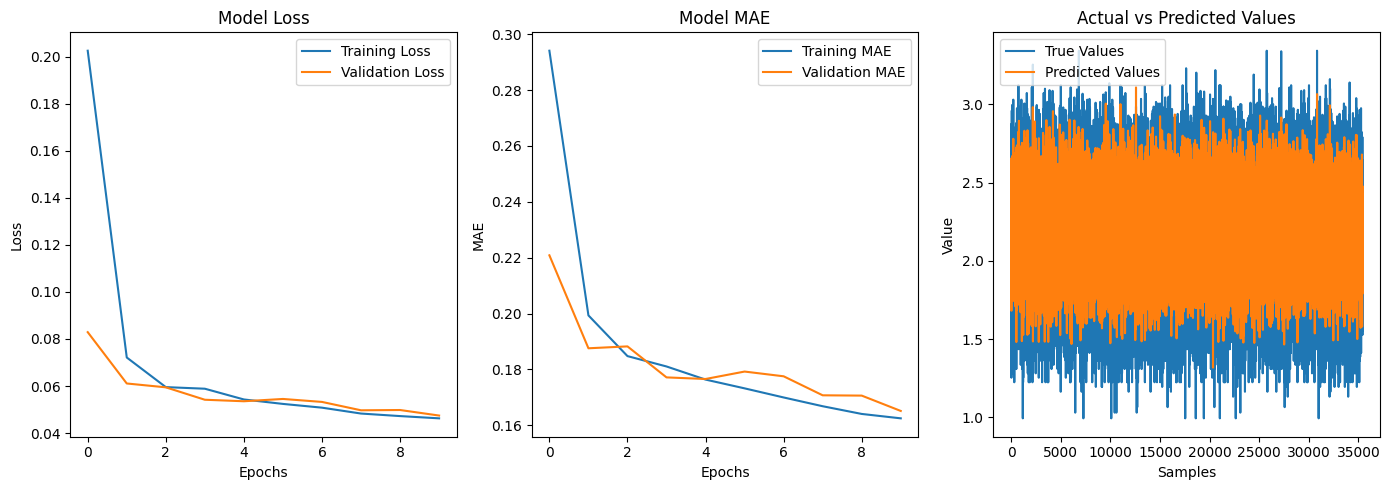

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing data
file_path = '/kaggle/input/train-ffill-bfill-final-with-1hot-encoding/train_ffill_bfill_final_with_1hot_encoding.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extracting target variable and features
target_values = data['bg+1:00']
columns_to_remove = ['id', 'p_num', 'time', 'bg+1:00', 'datetime']
feature_values = data.drop(columns=columns_to_remove)

# Dropping activity-related columns
activity_columns = [col for col in data.columns if col.startswith('activity')]
data = data.drop(columns=activity_columns)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM-BiLSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Defining the LSTM-BiLSTM cascade model
def create_lstm_bilstm_cascade_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, activation='relu', return_sequences=True)(inputs)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(32, activation='relu'))(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Initializing and training the LSTM-BiLSTM cascade model
cascade_model = create_lstm_bilstm_cascade_model((1, X_train_lstm.shape[2]))

# Setting up callbacks for checkpointing and early stopping
checkpoint = ModelCheckpoint(
    '/content/best_lstm_bilstm_cascade_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with timing
start_time = time.time()
cascade_history = cascade_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=10,  # Limiting to 10 epochs for quicker training
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)
cascade_training_duration = round(time.time() - start_time, 2)
print(f"{cascade_training_duration} sec for training")

# Making predictions on the test set
cascade_predicted_values = cascade_model.predict(X_test_lstm).flatten()  # Flattening predictions for ease of comparison

# Calculating evaluation metrics
cascade_root_mean_squared_error = np.sqrt(mean_squared_error(y_test, cascade_predicted_values))
cascade_mean_absolute_error_value = mean_absolute_error(y_test, cascade_predicted_values)
cascade_mean_squared_error_value = mean_squared_error(y_test, cascade_predicted_values)
cascade_r_squared_value = r2_score(y_test, cascade_predicted_values)

print(f"RMSE: {cascade_root_mean_squared_error:.4f}")
print(f"MAE: {cascade_mean_absolute_error_value:.4f}")
print(f"MSE: {cascade_mean_squared_error_value:.4f}")
print(f"R² Score: {cascade_r_squared_value:.4f}")

# Plotting training history and model predictions
plt.figure(figsize=(14, 5))

# Plotting the loss (Training vs Validation Loss)
plt.subplot(1, 3, 1)
plt.plot(cascade_history.history['loss'], label='Training Loss')
plt.plot(cascade_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the MAE (Training vs Validation MAE)
plt.subplot(1, 3, 2)
plt.plot(cascade_history.history['mae'], label='Training MAE')
plt.plot(cascade_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Actual vs Predicted values
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label='True Values')
plt.plot(cascade_predicted_values, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.savefig('/content/lstm_bilstm_cascade_training_metrics.png')  # Saving the plot as an image
plt.show()  # Displaying the plot


<ipython-input-2-2c93b56b203f>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha="right")


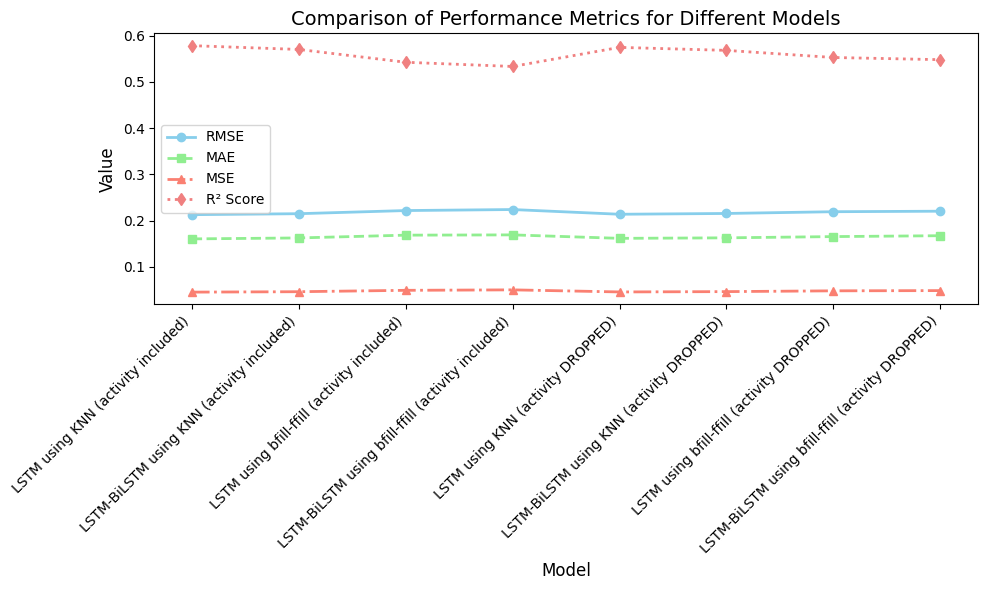

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = [
    "LSTM using KNN (activity included)", "LSTM-BiLSTM using KNN (activity included)",
    "LSTM using bfill-ffill (activity included)", "LSTM-BiLSTM using bfill-ffill (activity included)",
    "LSTM using KNN (activity DROPPED)", "LSTM-BiLSTM using KNN (activity DROPPED)",
    "LSTM using bfill-ffill (activity DROPPED)", "LSTM-BiLSTM using bfill-ffill (activity DROPPED)"
]

rmse = [0.2127, 0.2148, 0.2216, 0.2238, 0.2136, 0.2153, 0.2191, 0.2202]
mae = [0.1603, 0.1624, 0.1684, 0.1690, 0.1615, 0.1626, 0.1653, 0.1672]
mse = [0.0452, 0.0461, 0.0491, 0.0501, 0.0456, 0.0463, 0.0480, 0.0485]
r2_score = [0.5782, 0.5700, 0.5423, 0.5332, 0.5745, 0.5680, 0.5526, 0.5479]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a line graph
ax.plot(models, rmse, label='RMSE', marker='o', linestyle='-', color='skyblue', linewidth=2)
ax.plot(models, mae, label='MAE', marker='s', linestyle='--', color='lightgreen', linewidth=2)
ax.plot(models, mse, label='MSE', marker='^', linestyle='-.', color='salmon', linewidth=2)
ax.plot(models, r2_score, label='R² Score', marker='d', linestyle=':', color='lightcoral', linewidth=2)

# Labeling the plot
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Comparison of Performance Metrics for Different Models', fontsize=14)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
